# Salary Prediction using Polynomial Regression

Welcome to this beginner-friendly notebook! We will learn how to predict salaries based on position levels.

We will do this in two steps:
1. **Linear Regression**: We will try a straight line fit (Simple but often inaccurate for curved data).
2. **Polynomial Regression**: We will use a curved line fit (Much better for this dataset).

Let's get started!

## 1. Importing Libraries
First, we need to import the tools we will use:
- `numpy`: For math operations.
- `matplotlib.pyplot`: For drawing graphs.
- `pandas`: For importing and managing datasets.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Importing the Dataset
We will read our data from `dataset.csv`.
- `x`: These are the Features (Level). We take all rows and all columns except the last one.
- `y`: This is the Target (Salary). We take all rows and only the last column.

In [34]:
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, :-1].values  # Level
y = dataset.iloc[:, -1].values   # Salary

# Let's print them to see what they look like
print("Features (Level):\n", X)
print("\nTarget (Salary):\n", y)

Features (Level):
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

Target (Salary):
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## 3. Training the Linear Regression Model
Let's first try to fit a straight line to our data.

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 4. Training the Polynomial Regression Model
Now, let's create a model that can fit curves. We change our features into polynomial features (like $x^2, x^3, x^4$).
We will use `degree=4` for a very accurate fit.

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 5. Visualising the Linear Regression results
Here is what the straight line looks like against our data. You will see it doesn't fit very well.

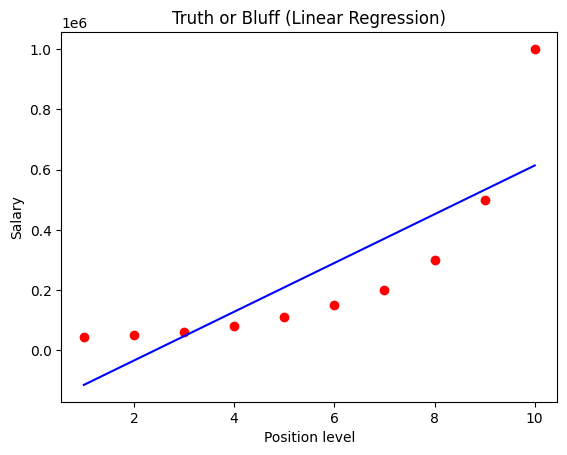

In [37]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 6. Visualising the Polynomial Regression results
Now let's see the polynomial curve. This should look much better!

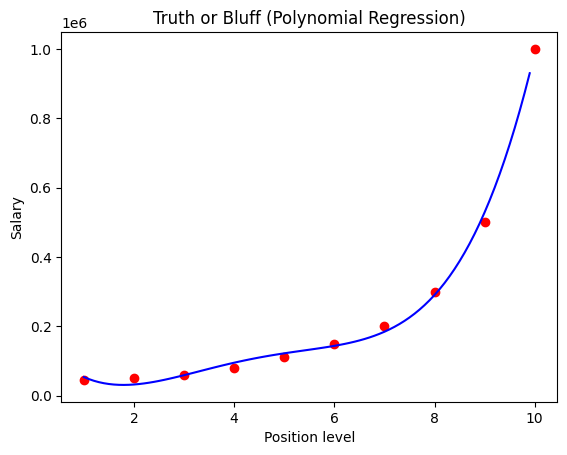

In [38]:
X_grid = np.arange(X.min(), X.max(), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 7. Predicting a new result
Finally, let's predict the salary for specific levels.

### Linear Regression Prediction

In [39]:
# Predicting a result with Linear Regression
print("Linear Regression Prediction (Level 6.5): ", lin_reg.predict([[6.5]]))

Linear Regression Prediction (Level 6.5):  [330378.78787879]


### Polynomial Regression Prediction
This is the one we care about!

In [40]:
# Predicting a result with Polynomial Regression
print("Polynomial Regression Prediction (Level 6.5): ", lin_reg_2.predict(poly_reg.fit_transform([[6.5]])))


Polynomial Regression Prediction (Level 6.5):  [158862.45265155]


## 8. Interactive Prediction
Use this cell to enter any level you want and get the predicted salary.

In [41]:
try:
    level = float(input("Enter a position level to predict salary (e.g., 6.5): "))
    prediction = lin_reg_2.predict(poly_reg.fit_transform([[level]]))
    print(f"Predicted Salary for Level {level}: ${prediction[0]:,.2f}")
except ValueError:
    print("Please enter a valid number.")

Predicted Salary for Level 1.0: $53,356.64
